In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Exercício 1

In [22]:
class_0 = np.random.normal((2,3),(0.8,2.5),(100,2))
class_1 = np.random.normal((5,6),(1.2,1.9),(100,2))
class_2 = np.random.normal((8,1),(0.9,0.9),(100,2))
class_3 = np.random.normal((15,4),(0.5,2),(100,2))

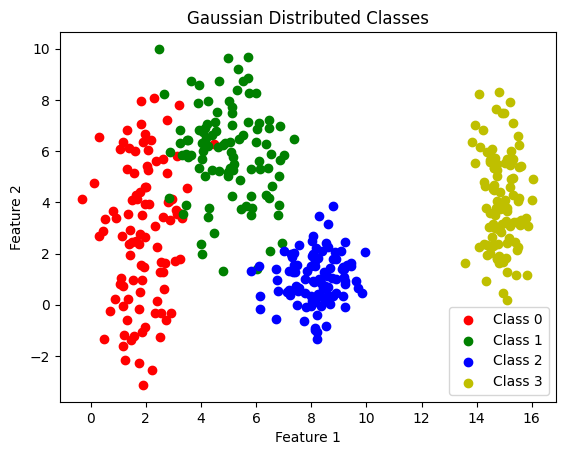

In [23]:
plt.scatter(class_0[:,0], class_0[:,1], color='r', label='Class 0')
plt.scatter(class_1[:,0], class_1[:,1], color='g', label='Class 1')
plt.scatter(class_2[:,0], class_2[:,1], color='b', label='Class 2')
plt.scatter(class_3[:,0], class_3[:,1], color='y', label='Class 3')
plt.title('Gaussian Distributed Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Exercício 2

In [40]:
mean_A = [0,0,0,0,0]

cov_A = [
    [1,0.8,0.1,0,0],
    [0.8,1,0.3,0,0],
    [0.1,0.3,1,0.5,0],
    [0,0,0.5,1,0.2],
    [0,0,0,0.2,1]
]

mean_B = [1.5,1.5,1.5,1.5,1.5]

cov_B = [
    [1.5,-0.7,0.2,0,0],
    [-0.7,1.5,0.4,0,0],
    [0.2,0.4,1.5,0.6,0],
    [0,0,0.6,1.5,0.3],
    [0,0,0,0.3,1.5]
]

class_A = np.random.multivariate_normal(mean_A,cov_A,size=500)
class_B = np.random.multivariate_normal(mean_B,cov_B,size=500)
class_A.shape, class_B.shape

((500, 5), (500, 5))

In [41]:
X = np.vstack((class_A, class_B))
print(X.shape)
y = np.hstack((np.zeros(500), np.ones(500)))
print(y.shape)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

X_A = X_reduced[y == 0]
X_B = X_reduced[y == 1]

(1000, 5)
(1000,)


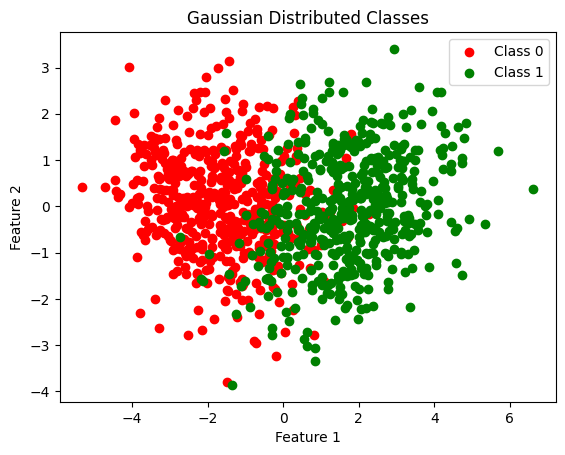

In [42]:
plt.scatter(X_A[:,0],X_A[:,1], color='r', label='Class 0')
plt.scatter(X_B[:,0], X_B[:,1], color='g', label='Class 1')
plt.title('Gaussian Distributed Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Exercício 3

In [114]:
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [115]:
df['PassengerId'].nunique(), df.shape[0] ## Verificando se há IDs repetidos

(8693, 8693)

In [116]:
df = df.drop(columns=['PassengerId', 'Name', 'Cabin']) ## Removendo colunas irrelevantes
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


<Axes: >

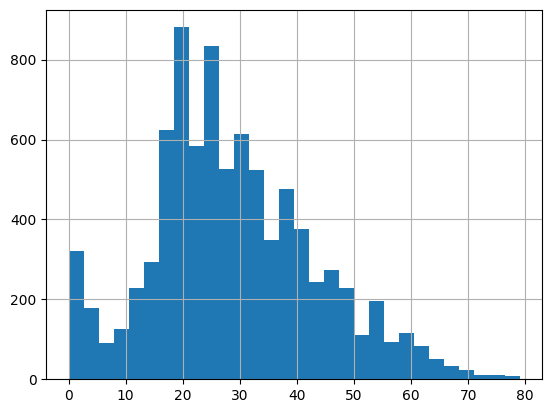

In [117]:
df['Age'].hist(bins=30)

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64


<Axes: >

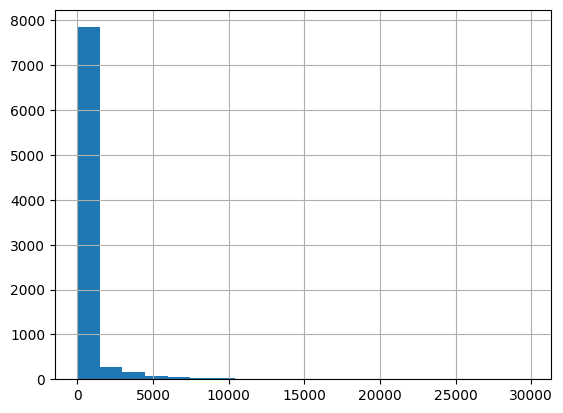

In [118]:
print(df['FoodCourt'].describe())
df['FoodCourt'].hist(bins=20)

In [119]:
for column in df.columns:
    print(f'{column}: {df[column].isna().sum()} missing values')

HomePlanet: 201 missing values
CryoSleep: 217 missing values
Destination: 182 missing values
Age: 179 missing values
VIP: 203 missing values
RoomService: 181 missing values
FoodCourt: 183 missing values
ShoppingMall: 208 missing values
Spa: 183 missing values
VRDeck: 188 missing values
Transported: 0 missing values


### Lidando com dados nulos

In [120]:
columns_num = ['VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt', 'RoomService']
for col in columns_num:
    df[col] = df[col].fillna(0)

df['Age'] = df['Age'].fillna(df['Age'].median())

columns_cat = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in columns_cat:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum()


C:\Users\thipc\AppData\Local\Temp\ipykernel_12724\3712912248.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [121]:
df = pd.get_dummies(df, columns=columns_cat, prefix=columns_cat, drop_first=True)

df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,True,False,False,False,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True,True,False,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,False,False,False,False,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,True,False,False,False,False,False


In [122]:
scaler = MinMaxScaler(feature_range=(-1,1))

for col in columns_num + ['Age']:
    df[[col]] = scaler.fit_transform(df[[col]])

df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,-0.012658,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,False,True,False,False,False,True,False
1,-0.392405,-0.984784,-0.999396,-0.997872,-0.951000,-0.996354,True,False,False,False,False,True,False
2,0.468354,-0.993997,-0.760105,-1.000000,-0.400660,-0.995939,False,True,False,False,False,True,True
3,-0.164557,-1.000000,-0.913930,-0.968415,-0.702874,-0.984005,False,True,False,False,False,True,False
4,-0.594937,-0.957702,-0.995304,-0.987145,-0.949572,-0.999834,True,False,False,False,False,True,False


In [123]:
col_cat_new = [col for col in df.columns if col not in columns_num + ['Age']]

for col in col_cat_new:
    df[col] = df[col].astype('int')

df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,-0.012658,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,1,0,0,0,1,0
1,-0.392405,-0.984784,-0.999396,-0.997872,-0.951000,-0.996354,1,0,0,0,0,1,0
2,0.468354,-0.993997,-0.760105,-1.000000,-0.400660,-0.995939,0,1,0,0,0,1,1
3,-0.164557,-1.000000,-0.913930,-0.968415,-0.702874,-0.984005,0,1,0,0,0,1,0
4,-0.594937,-0.957702,-0.995304,-0.987145,-0.949572,-0.999834,1,0,0,0,0,1,0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   int64  
 7   HomePlanet_Europa          8693 non-null   int64  
 8   HomePlanet_Mars            8693 non-null   int64  
 9   CryoSleep_True             8693 non-null   int64  
 10  Destination_PSO J318.5-22  8693 non-null   int64  
 11  Destination_TRAPPIST-1e    8693 non-null   int64  
 12  VIP_True                   8693 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 883.0 KB


<Axes: >

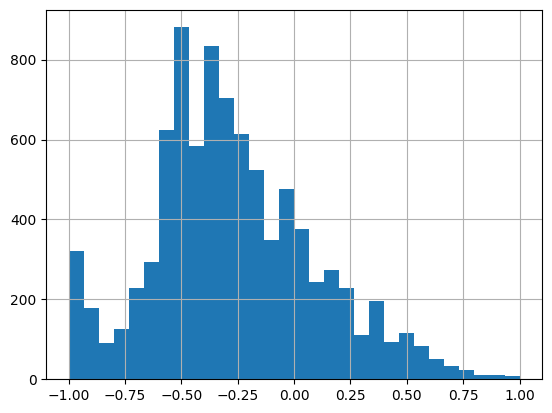

In [125]:
df['Age'].hist(bins=30)

<Axes: >

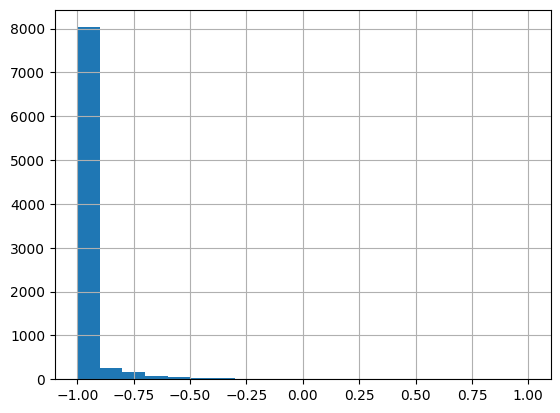

In [126]:
df['FoodCourt'].hist(bins=20)